### RLC circuit model

Transient simulation of a simple RLC circuit in a form of a system of ordinary differential equations.
The goal here is to investigate how to integrate the model with Finite Element Method.

In [1]:
# Stub file generated with: PLECS 4.5.8

In [2]:
N = 2 # state variables
M = 1 # output variables

rlc_D_double = zeros(N)
# state vector
rlc_PM0_x = zeros(N)
rlc_PM0_prevX = zeros(N)
# input variable vector?
rlc_PM0_u = zeros(M)
rlc_PM0_prevU = zeros(M)
# output variable vector
rlc_PM0_y = zeros(M)
nothing

In [3]:
using SparseArrays
rlc_PM0_A  = [ 0.989553196031825122 -0.009948507975433002
               0.099485079754330019  0.999501704007258129]
rlc_PM0_B0 = [ 0.004965548048013915; 0.000332053463461062]
rlc_PM0_B1 = [ 0.004982959927419086; 0.000166242529280847]
nothing

In [4]:
function rlc_PM0_update(A, B0, B1, x)
   global rlc_PM0_prevX
   global rlc_PM0_prevU
   global rlc_PM0_u
   x .= A  * rlc_PM0_prevX #=
   =#.+ B0.* rlc_PM0_prevU #=
   =#.+ B1.* rlc_PM0_u
   return nothing
end                

rlc_PM0_update (generic function with 1 method)

In [5]:
# global variables
rlc_first = true;
rlc_sampleTime = 0.00001;

In [6]:
function rlc_initialize(time)
   global rlc_D_double
   global rlc_PM0_x
   global rlc_first
    
   rlc_tickHi = time/2^32/rlc_sampleTime |> floor;
   remainder  = time-2^32*rlc_sampleTime * rlc_tickHi;
   
   rlc_tickLo =  remainder / rlc_sampleTime |> ceil;
   remainder -= rlc_tickLo * rlc_sampleTime;
   if abs(remainder) > 1e-6abs(time)
      println("Start time must be an integer multiple of the base sample time.")
   end
    
   # Initialization for Sine Wave Generator : 'rlc/Sine Wave'
   rlc_D_double[1] = sin(10.0 * 3.14159265358979312 * time);
   rlc_D_double[2] = cos(10.0 * 3.14159265358979312 * time);

   # Initialization for Subsystem : 'rlc'
   rlc_PM0_x .= [0.0, 0.0]
   rlc_first = true
   return nothing
end

rlc_initialize (generic function with 1 method)

In [7]:
function rlc_step()
   global rlc_first
   global rlc_PM0_A
   global rlc_PM0_x
   global rlc_PM0_y
   global rlc_PM0_u
   global rlc_PM0_B0
   global rlc_PM0_B1
   
   # Sine Wave Generator : 'rlc/Sine Wave'
   rlc_B_SineWave = 0. + 1.0 * (1.0 * rlc_D_double[1] + 0.0 * rlc_D_double[2]);

   # electrical input?
   rlc_PM0_u[1]=rlc_B_SineWave; # Voltage Source (Controlled) : 'rlc/V'
   
   if rlc_first == false
      rlc_PM0_prevX .= rlc_PM0_x
      rlc_PM0_update(rlc_PM0_A,
                     rlc_PM0_B0,
                     rlc_PM0_B1,
                     rlc_PM0_x);
   end
   # electrical output?
   rlc_PM0_y[1] = 1.0 * rlc_PM0_x[1];
   
   rlc_first = false

   # Update for Sine Wave Generator : 'rlc/Sine Wave' */
   let
      scaling = 1. + 0.5(rlc_D_double[1]*rlc_D_double[1] +
                         rlc_D_double[2]*rlc_D_double[2] - 1.);
      scaledX = rlc_D_double[1] / scaling;
      scaledY = rlc_D_double[2] / scaling;
      rlc_D_double[1] = 0.999999950651978442 * scaledX +
                        0.000314159260191267 * scaledY;
      rlc_D_double[2] =-0.000314159260191267 * scaledX +
                        0.999999950651978442 * scaledY;
   end

   # Update for Subsystem : 'rlc'
   rlc_PM0_u[1]   = rlc_B_SineWave; # Voltage Source (Controlled) : 'rlc/V'
   rlc_PM0_prevU .= rlc_PM0_u
end

rlc_step (generic function with 1 method)

In [8]:
rlc_terminate() = return nothing

rlc_terminate (generic function with 1 method)

In [9]:
using Printf

T = 5000
u = zeros(T)
y = zeros(T)
t = range(0, stop=T-1) * rlc_sampleTime

rlc_initialize(first(t))
println("    u     y     ")
println("================")
for i=1:T
    rlc_step()
    u[i] = rlc_PM0_u[1]
    y[i] = rlc_PM0_y[1]
    @printf("%+07.3g %+07.3g\n", u[i], y[i])
end
rlc_terminate()

    u     y     
+000000 +000000
+0.000314 +1.57e-06
+0.000628 +6.24e-06
+0.000942 +1.4e-05
+0.00126 +2.48e-05
+0.00157 +3.85e-05
+0.00188 +5.53e-05
+0.0022 +7.49e-05
+0.00251 +9.74e-05
+0.00283 +0.000123
+0.00314 +0.000151
+0.00346 +0.000181
+0.00377 +0.000215
+0.00408 +0.000251
+0.0044 +0.000289
+0.00471 +0.00033
+0.00503 +0.000374
+0.00534 +0.000419
+0.00565 +0.000467
+0.00597 +0.000517
+0.00628 +0.000569
+0.0066 +0.000624
+0.00691 +0.00068
+0.00723 +0.000738
+0.00754 +0.000798
+0.00785 +0.000859
+0.00817 +0.000923
+0.00848 +0.000988
+0.0088 +0.00105
+0.00911 +0.00112
+0.00942 +0.00119
+0.00974 +0.00126
+0.0101 +0.00133
+0.0104 +0.00141
+0.0107 +0.00148
+00.011 +0.00155
+0.0113 +0.00163
+0.0116 +0.00171
+0.0119 +0.00178
+0.0123 +0.00186
+0.0126 +0.00194
+0.0129 +0.00202
+0.0132 +0.00209
+0.0135 +0.00217
+0.0138 +0.00225
+0.0141 +0.00233
+0.0145 +0.00241
+0.0148 +0.00249
+0.0151 +0.00257
+0.0154 +0.00265
+0.0157 +0.00273
+00.016 +0.0028
+0.0163 +0.00288
+0.0166 +0.00296
+00.017 +0.00

+00.189 +0.00293
+000.19 +0.00293
+000.19 +0.00293
+000.19 +0.00293
+000.19 +0.00294
+00.191 +0.00294
+00.191 +0.00294
+00.191 +0.00294
+00.192 +0.00294
+00.192 +0.00294
+00.192 +0.00294
+00.193 +0.00294
+00.193 +0.00295
+00.193 +0.00295
+00.194 +0.00295
+00.194 +0.00295
+00.194 +0.00295
+00.194 +0.00296
+00.195 +0.00296
+00.195 +0.00296
+00.195 +0.00296
+00.196 +0.00297
+00.196 +0.00297
+00.196 +0.00297
+00.197 +0.00298
+00.197 +0.00298
+00.197 +0.00298
+00.198 +0.00298
+00.198 +0.00299
+00.198 +0.00299
+00.198 +0.00299
+00.199 +00.003
+00.199 +00.003
+00.199 +00.003
+0000.2 +0.00301
+0000.2 +0.00301
+0000.2 +0.00301
+00.201 +0.00302
+00.201 +0.00302
+00.201 +0.00303
+00.202 +0.00303
+00.202 +0.00303
+00.202 +0.00304
+00.202 +0.00304
+00.203 +0.00304
+00.203 +0.00305
+00.203 +0.00305
+00.204 +0.00306
+00.204 +0.00306
+00.204 +0.00306
+00.205 +0.00307
+00.205 +0.00307
+00.205 +0.00307
+00.206 +0.00308
+00.206 +0.00308
+00.206 +0.00308
+00.206 +0.00309
+00.207 +0.00309
+00.207 +0.00309


+00.372 +0.00291
+00.372 +0.00291
+00.372 +0.00291
+00.373 +0.00291
+00.373 +0.00291
+00.373 +0.00291
+00.373 +0.00291
+00.374 +0.00291
+00.374 +0.00291
+00.374 +0.00291
+00.375 +0.00291
+00.375 +0.00291
+00.375 +0.00291
+00.375 +0.00291
+00.376 +0.00291
+00.376 +0.00291
+00.376 +0.00291
+00.377 +0.00291
+00.377 +0.00291
+00.377 +0.00291
+00.377 +0.00291
+00.378 +0.00291
+00.378 +0.00291
+00.378 +0.00291
+00.379 +0.00291
+00.379 +0.00291
+00.379 +0.00291
+00.379 +0.00291
+000.38 +0.00291
+000.38 +0.00291
+000.38 +0.00291
+00.381 +0.00291
+00.381 +0.00291
+00.381 +0.00291
+00.382 +0.0029
+00.382 +0.0029
+00.382 +0.0029
+00.382 +0.0029
+00.383 +0.0029
+00.383 +0.0029
+00.383 +0.0029
+00.384 +0.0029
+00.384 +0.0029
+00.384 +0.0029
+00.384 +0.0029
+00.385 +0.0029
+00.385 +0.0029
+00.385 +0.0029
+00.386 +0.0029
+00.386 +0.0029
+00.386 +0.0029
+00.386 +0.0029
+00.387 +0.0029
+00.387 +0.0029
+00.387 +0.0029
+00.388 +0.0029
+00.388 +0.0029
+00.388 +0.0029
+00.388 +0.0029
+00.389 +0.0029
+00.38

+00.541 +0.00265
+00.541 +0.00265
+00.542 +0.00265
+00.542 +0.00265
+00.542 +0.00265
+00.542 +0.00264
+00.543 +0.00264
+00.543 +0.00264
+00.543 +0.00264
+00.543 +0.00264
+00.544 +0.00264
+00.544 +0.00264
+00.544 +0.00264
+00.545 +0.00264
+00.545 +0.00264
+00.545 +0.00264
+00.545 +0.00264
+00.546 +0.00264
+00.546 +0.00264
+00.546 +0.00264
+00.546 +0.00264
+00.547 +0.00264
+00.547 +0.00264
+00.547 +0.00263
+00.547 +0.00263
+00.548 +0.00263
+00.548 +0.00263
+00.548 +0.00263
+00.548 +0.00263
+00.549 +0.00263
+00.549 +0.00263
+00.549 +0.00263
+000.55 +0.00263
+000.55 +0.00263
+000.55 +0.00263
+000.55 +0.00263
+00.551 +0.00263
+00.551 +0.00263
+00.551 +0.00263
+00.551 +0.00263
+00.552 +0.00263
+00.552 +0.00263
+00.552 +0.00262
+00.552 +0.00262
+00.553 +0.00262
+00.553 +0.00262
+00.553 +0.00262
+00.553 +0.00262
+00.554 +0.00262
+00.554 +0.00262
+00.554 +0.00262
+00.555 +0.00262
+00.555 +0.00262
+00.555 +0.00262
+00.555 +0.00262
+00.556 +0.00262
+00.556 +0.00262
+00.556 +0.00262
+00.556 +0.002

+00.691 +0.00228
+00.691 +0.00228
+00.691 +0.00228
+00.692 +0.00228
+00.692 +0.00228
+00.692 +0.00227
+00.692 +0.00227
+00.693 +0.00227
+00.693 +0.00227
+00.693 +0.00227
+00.693 +0.00227
+00.693 +0.00227
+00.694 +0.00227
+00.694 +0.00227
+00.694 +0.00227
+00.694 +0.00227
+00.695 +0.00227
+00.695 +0.00227
+00.695 +0.00227
+00.695 +0.00227
+00.695 +0.00226
+00.696 +0.00226
+00.696 +0.00226
+00.696 +0.00226
+00.696 +0.00226
+00.697 +0.00226
+00.697 +0.00226
+00.697 +0.00226
+00.697 +0.00226
+00.697 +0.00226
+00.698 +0.00226
+00.698 +0.00226
+00.698 +0.00226
+00.698 +0.00226
+00.699 +0.00225
+00.699 +0.00225
+00.699 +0.00225
+00.699 +0.00225
+0000.7 +0.00225
+0000.7 +0.00225
+0000.7 +0.00225
+0000.7 +0.00225
+0000.7 +0.00225
+00.701 +0.00225
+00.701 +0.00225
+00.701 +0.00225
+00.701 +0.00225
+00.702 +0.00225
+00.702 +0.00225
+00.702 +0.00224
+00.702 +0.00224
+00.702 +0.00224
+00.703 +0.00224
+00.703 +0.00224
+00.703 +0.00224
+00.703 +0.00224
+00.704 +0.00224
+00.704 +0.00224
+00.704 +0.002

+00.815 +0.00183
+00.815 +0.00183
+00.816 +0.00183
+00.816 +0.00183
+00.816 +0.00182
+00.816 +0.00182
+00.816 +0.00182
+00.817 +0.00182
+00.817 +0.00182
+00.817 +0.00182
+00.817 +0.00182
+00.817 +0.00182
+00.817 +0.00182
+00.818 +0.00182
+00.818 +0.00182
+00.818 +0.00182
+00.818 +0.00181
+00.818 +0.00181
+00.819 +0.00181
+00.819 +0.00181
+00.819 +0.00181
+00.819 +0.00181
+00.819 +0.00181
+00.819 +0.00181
+000.82 +0.00181
+000.82 +0.00181
+000.82 +0.00181
+000.82 +0.00181
+000.82 +0.0018
+000.82 +0.0018
+00.821 +0.0018
+00.821 +0.0018
+00.821 +0.0018
+00.821 +0.0018
+00.821 +0.0018
+00.822 +0.0018
+00.822 +0.0018
+00.822 +0.0018
+00.822 +0.0018
+00.822 +0.0018
+00.822 +0.0018
+00.823 +0.00179
+00.823 +0.00179
+00.823 +0.00179
+00.823 +0.00179
+00.823 +0.00179
+00.824 +0.00179
+00.824 +0.00179
+00.824 +0.00179
+00.824 +0.00179
+00.824 +0.00179
+00.824 +0.00179
+00.825 +0.00179
+00.825 +0.00178
+00.825 +0.00178
+00.825 +0.00178
+00.825 +0.00178
+00.825 +0.00178
+00.826 +0.00178
+00.826 +0

+000.91 +0.00131
+000.91 +0.00131
+000.91 +0.00131
+000.91 +0.00131
+00.911 +0.00131
+00.911 +0.00131
+00.911 +0.00131
+00.911 +0.0013
+00.911 +0.0013
+00.911 +0.0013
+00.911 +0.0013
+00.912 +0.0013
+00.912 +0.0013
+00.912 +0.0013
+00.912 +0.0013
+00.912 +0.0013
+00.912 +0.0013
+00.912 +0.0013
+00.912 +0.00129
+00.913 +0.00129
+00.913 +0.00129
+00.913 +0.00129
+00.913 +0.00129
+00.913 +0.00129
+00.913 +0.00129
+00.913 +0.00129
+00.913 +0.00129
+00.914 +0.00129
+00.914 +0.00129
+00.914 +0.00128
+00.914 +0.00128
+00.914 +0.00128
+00.914 +0.00128
+00.914 +0.00128
+00.914 +0.00128
+00.915 +0.00128
+00.915 +0.00128
+00.915 +0.00128
+00.915 +0.00128
+00.915 +0.00128
+00.915 +0.00127
+00.915 +0.00127
+00.915 +0.00127
+00.916 +0.00127
+00.916 +0.00127
+00.916 +0.00127
+00.916 +0.00127
+00.916 +0.00127
+00.916 +0.00127
+00.916 +0.00127
+00.917 +0.00127
+00.917 +0.00126
+00.917 +0.00126
+00.917 +0.00126
+00.917 +0.00126
+00.917 +0.00126
+00.917 +0.00126
+00.917 +0.00126
+00.918 +0.00126
+00.918 

+00.971 +0.00076
+00.971 +0.000759
+00.971 +0.000758
+00.971 +0.000757
+00.971 +0.000756
+00.971 +0.000756
+00.971 +0.000755
+00.972 +0.000754
+00.972 +0.000753
+00.972 +0.000752
+00.972 +0.000751
+00.972 +0.00075
+00.972 +0.000749
+00.972 +0.000748
+00.972 +0.000747
+00.972 +0.000746
+00.972 +0.000745
+00.972 +0.000744
+00.972 +0.000743
+00.972 +0.000742
+00.973 +0.000741
+00.973 +0.00074
+00.973 +0.000739
+00.973 +0.000738
+00.973 +0.000737
+00.973 +0.000736
+00.973 +0.000735
+00.973 +0.000734
+00.973 +0.000733
+00.973 +0.000733
+00.973 +0.000732
+00.973 +0.000731
+00.973 +0.00073
+00.973 +0.000729
+00.974 +0.000728
+00.974 +0.000727
+00.974 +0.000726
+00.974 +0.000725
+00.974 +0.000724
+00.974 +0.000723
+00.974 +0.000722
+00.974 +0.000721
+00.974 +0.00072
+00.974 +0.000719
+00.974 +0.000718
+00.974 +0.000717
+00.974 +0.000716
+00.974 +0.000715
+00.975 +0.000714
+00.975 +0.000713
+00.975 +0.000712
+00.975 +0.000711
+00.975 +0.00071
+00.975 +0.000709
+00.975 +0.000708
+00.975 +0.00070

+000001 +6.51e-05
+000001 +6.42e-05
+000001 +6.32e-05
+000001 +6.22e-05
+000001 +6.12e-05
+000001 +6.02e-05
+000001 +5.92e-05
+000001 +5.82e-05
+000001 +5.72e-05
+000001 +5.63e-05
+000001 +5.53e-05
+000001 +5.43e-05
+000001 +5.33e-05
+000001 +5.23e-05
+000001 +5.13e-05
+000001 +5.03e-05
+000001 +4.94e-05
+000001 +4.84e-05
+000001 +4.74e-05
+000001 +4.64e-05
+000001 +4.54e-05
+000001 +4.44e-05
+000001 +4.34e-05
+000001 +4.24e-05
+000001 +4.15e-05
+000001 +4.05e-05
+000001 +3.95e-05
+000001 +3.85e-05
+000001 +3.75e-05
+000001 +3.65e-05
+000001 +3.55e-05
+000001 +3.45e-05
+000001 +3.36e-05
+000001 +3.26e-05
+000001 +3.16e-05
+000001 +3.06e-05
+000001 +2.96e-05
+000001 +2.86e-05
+000001 +2.76e-05
+000001 +2.67e-05
+000001 +2.57e-05
+000001 +2.47e-05
+000001 +2.37e-05
+000001 +2.27e-05
+000001 +2.17e-05
+000001 +2.07e-05
+000001 +1.97e-05
+000001 +1.88e-05
+000001 +1.78e-05
+000001 +1.68e-05
+000001 +1.58e-05
+000001 +1.48e-05
+000001 +1.38e-05
+000001 +1.28e-05
+000001 +1.18e-05
+000001 +1

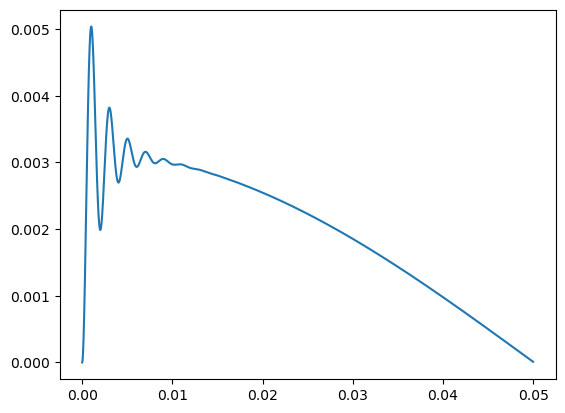

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc919b264c0>

In [10]:
using PyPlot
plot(t, y)

In [11]:
last(t)

0.04999